## Problem Statement

## Importing important libraries

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.impute import SimpleImputer
import datetime
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import StandardScaler

## Data Loading

In [155]:
df = pd.read_csv(r"dataset.csv")
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


##### Checking shape of the data 

In [76]:
df.shape

(197428, 14)

In [8]:
df.head(2)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [86]:
df.isna().sum()

market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

In [156]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True,ascending=False)
missing_value_df

,column_name,percent_missing
total_onshift_partners,total_onshift_partners,8.236927
total_busy_partners,total_busy_partners,8.236927
total_outstanding_orders,total_outstanding_orders,8.236927
store_primary_category,store_primary_category,2.411006
order_protocol,order_protocol,0.503981
market_id,market_id,0.499929
actual_delivery_time,actual_delivery_time,0.003546
created_at,created_at,0.000000
store_id,store_id,0.000000
total_items,total_items,0.000000


In [19]:
df.store_primary_category.value_counts()

american             19399
pizza                17321
mexican              17099
burger               10958
sandwich             10060
                     ...  
lebanese                 9
belgian                  2
indonesian               2
chocolate                1
alcohol-plus-food        1
Name: store_primary_category, Length: 74, dtype: int64

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 196441 non-null  float64       
 1   created_at                197428 non-null  datetime64[ns]
 2   actual_delivery_time      197421 non-null  datetime64[ns]
 3   store_id                  197428 non-null  object        
 4   store_primary_category    192668 non-null  object        
 5   order_protocol            196433 non-null  float64       
 6   total_items               197428 non-null  int64         
 7   subtotal                  197428 non-null  int64         
 8   num_distinct_items        197428 non-null  int64         
 9   min_item_price            197428 non-null  int64         
 10  max_item_price            197428 non-null  int64         
 11  total_onshift_partners    181166 non-null  float64       
 12  to

In [25]:
df.head(2)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0


In [26]:
df['market_id'].value_counts()

2.0    55058
4.0    47599
1.0    38037
3.0    23297
5.0    18000
6.0    14450
Name: market_id, dtype: int64

<AxesSubplot: >

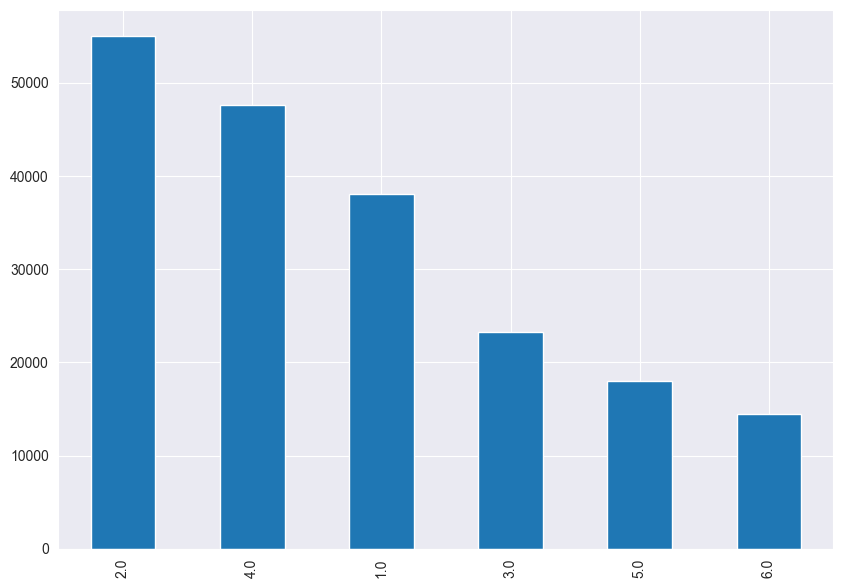

In [27]:
sns.set_style('darkgrid')
country = df['market_id'].value_counts().head(10)
fig, ax = plt.subplots(figsize=(10,7))
country.plot.bar(ax=ax)

In [157]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

##  Filling Missing Values

In [158]:
cat_missing = ['market_id','order_protocol','total_onshift_partners',
              'total_busy_partners','total_outstanding_orders','actual_delivery_time']
most_freq_imputer = SimpleImputer(strategy='mean')
for col in cat_missing:
    df[col] = pd.DataFrame(most_freq_imputer.fit_transform(pd.DataFrame(df[col])))
    
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

In [159]:
## Filling Categorical values
cat_missing = ['store_primary_category']
most_freq_imputer = SimpleImputer(strategy='most_frequent')
for col in cat_missing:
    df[col] = pd.DataFrame(most_freq_imputer.fit_transform(pd.DataFrame(df[col])))

In [160]:
df.head(2)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 197428 non-null  float64       
 1   created_at                197428 non-null  datetime64[ns]
 2   actual_delivery_time      197421 non-null  datetime64[ns]
 3   store_id                  197428 non-null  object        
 4   store_primary_category    197428 non-null  object        
 5   order_protocol            197428 non-null  float64       
 6   total_items               197428 non-null  int64         
 7   subtotal                  197428 non-null  int64         
 8   num_distinct_items        197428 non-null  int64         
 9   min_item_price            197428 non-null  int64         
 10  max_item_price            197428 non-null  int64         
 11  total_onshift_partners    197428 non-null  float64       
 12  to

In [112]:
df.isna().sum()

market_id                   0
created_at                  0
actual_delivery_time        7
store_id                    0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
dtype: int64

## Creating target feature (time)

In [161]:
# create a colume with timedelta as total minutes, as a float type
df['time'] = (df.actual_delivery_time  - df.created_at) / pd.Timedelta(minutes=1)

## Creating day of the week

In [162]:
df['day'] = df['created_at'].dt.day_name()

In [163]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time,day
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333,Friday
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667,Tuesday
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,american,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,29.683333,Thursday
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,american,1.0,6,6900,5,600,1800,1.0,1.0,2.0,51.250000,Tuesday
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,american,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,39.833333,Sunday


In [165]:
df.isna().sum()

market_id                   0
created_at                  0
actual_delivery_time        0
store_id                    0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
time                        0
day                         0
dtype: int64

In [164]:
df.dropna(inplace=True)

##  Checking Outliers

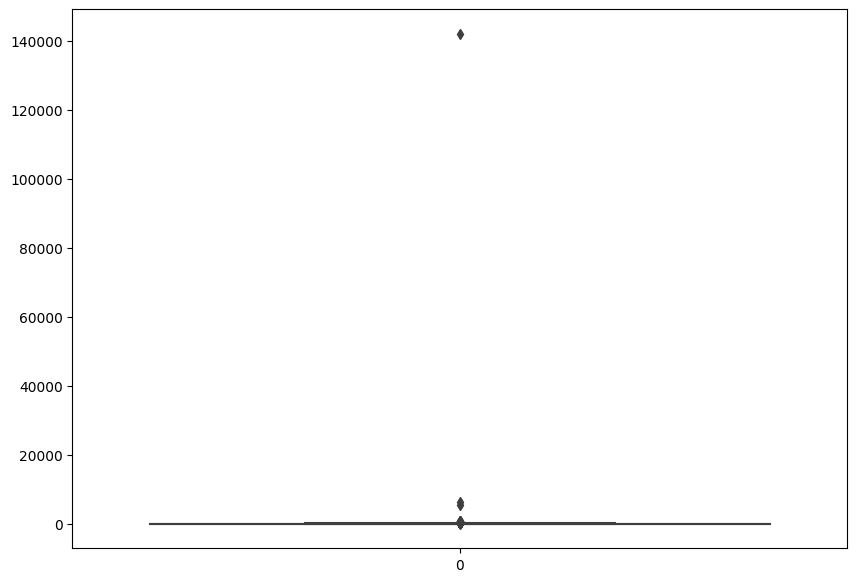

In [166]:
fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(df['time'],ax=ax);

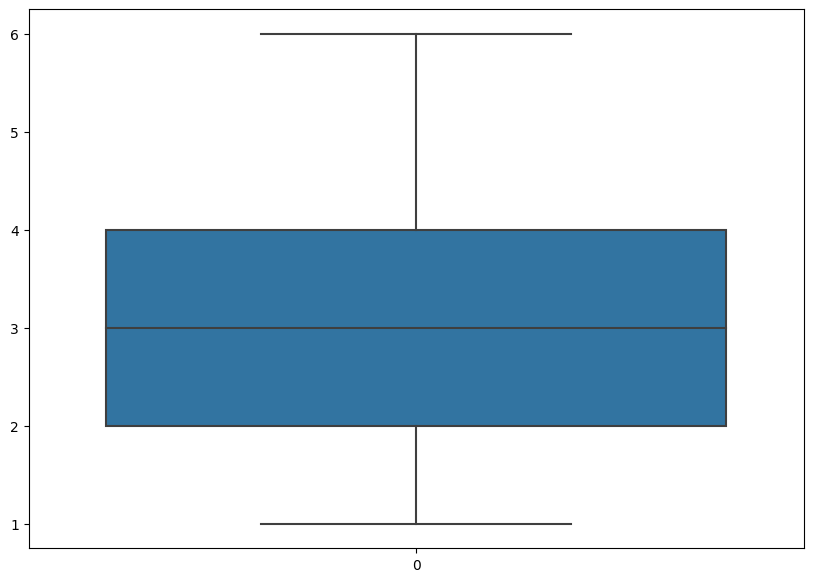

In [18]:
fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(df['market_id'],ax=ax);

In [20]:
df.head(3)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time,day
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333,Friday
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667,Tuesday
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,american,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,29.683333,Thursday


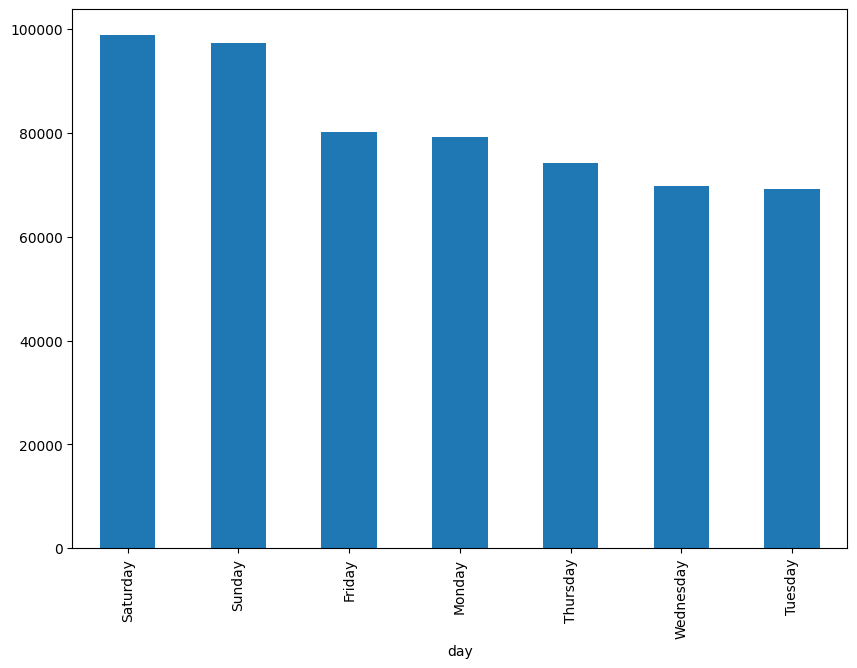

In [25]:
fig, ax = plt.subplots(figsize=(10,7))
df.groupby('day')['order_protocol'].sum().sort_values(ascending=False).head(10).plot.bar(ax=ax);

In [21]:
df['order_protocol'].value_counts()

1.000000    54725
3.000000    53199
5.000000    44290
2.000000    24052
4.000000    19354
2.882352      995
6.000000      794
7.000000       19
Name: order_protocol, dtype: int64

In [26]:
# Identify number of categorical features
for d in df.columns:
    if(df[d].dtype == 'O'):
        print(d,': ', df[d].nunique())

store_id :  6743
store_primary_category :  74
day :  7


##  Encode categorical fields as binary 

In [169]:
# Encode categorical fields as binary 
df = pd.get_dummies(df,sparse=False,columns=df.select_dtypes(include='object').columns)

In [168]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'order_protocol',
       'total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_partners',
       ...
       'store_primary_category_vegan', 'store_primary_category_vegetarian',
       'store_primary_category_vietnamese', 'day_Friday', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday'],
      dtype='object', length=6837)

In [170]:
df['created_at'] = pd.to_numeric(pd.to_datetime(df['created_at']))
df['actual_delivery_time'] = pd.to_numeric(pd.to_datetime(df['actual_delivery_time']))

In [172]:
df['created_at'] = np.asarray(df['created_at']).astype(dtype='uint8')
df['actual_delivery_time'] = np.asarray(df['actual_delivery_time']).astype(dtype='uint8')

In [174]:

X = df.drop('time',axis=1).values
y = df['time'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print('Training data contains %.0f records'%len(X_train))
print('Test data contains %.0f records'%len(X_test))

## Data Scaling

In [175]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

##  fitting model on scaling data

In [ ]:
X_train = np.asarray(X_train).astype(dtype='uint8')
y_train = np.asarray(y_train).astype(dtype='uint8')

history = model.fit(X_train, y_train,validation_data=(X_val, y_test),epochs=10, batch_size=128)

# 6. Model training with random forest

In [ ]:
# make a copy of original dataframe
df_copy = df.copy()

In [ ]:
# Split the data into training and testing sets
X = df_copy.drop('delivery_time', axis=1)  # Features
y = df['delivery_time']               # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a baseline random forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predict on the test set
y_pred = rf.predict(X_test)

In [ ]:
# Calculate various metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

MSE: 307.2448983606968
RMSE: 17.528402618627197
MAE: 11.761382382373315


## Creating model for Delivery  Prediction

In [121]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [122]:
def create_baseline():
    model = Sequential([
                    Dense(64, activation="relu",kernel_initializer='glorot_uniform'),
                    Dense(32, activation="relu",kernel_initializer='glorot_uniform'),
                    Dense(16, activation="relu",kernel_initializer='glorot_uniform'), 
                    Dense(8, activation="relu",kernel_initializer='glorot_uniform'), 
                    Dense(1,activation='softmax')])  
    return model

In [123]:
model = create_baseline()

In [124]:
model.compile(optimizer = tf.keras.optimizers.Adam(),loss='mean_squared_error')

In [125]:
X_train = np.asarray(X_train).astype(dtype='uint8')
y_train = np.asarray(y_train).astype(dtype='uint8')
# X_train = np.zeros(X_train,dtype='uint8')
# y_train = np.zeros(y_train,dtype='uint8')
history = model.fit(X_train, y_train,validation_data=(X_test, y_test),epochs=10, batch_size=128)

C:\Users\ManishaGodse\AppData\Local\Temp\ipykernel_7060\2823625760.py:1: RuntimeWarning: invalid value encountered in cast
  X_train = np.asarray(X_train).astype(dtype='uint8')


Epoch 1/10
1034/1034 [==============================] - 14s 13ms/step - loss: 2465.4534 - val_loss: 3637.8640
Epoch 2/10
1034/1034 [==============================] - 11s 11ms/step - loss: 2465.4570 - val_loss: 3637.8640
Epoch 3/10
1034/1034 [==============================] - 11s 10ms/step - loss: 2465.4558 - val_loss: 3637.8640
Epoch 4/10
1034/1034 [==============================] - 11s 11ms/step - loss: 2465.4546 - val_loss: 3637.8640
Epoch 5/10
1034/1034 [==============================] - 12s 12ms/step - loss: 2465.4534 - val_loss: 3637.8640
Epoch 6/10
1034/1034 [==============================] - 15s 15ms/step - loss: 2465.4541 - val_loss: 3637.8640
Epoch 7/10
1034/1034 [==============================] - 12s 12ms/step - loss: 2465.4529 - val_loss: 3637.8640
Epoch 8/10
1034/1034 [==============================] - 10s 10ms/step - loss: 2465.4551 - val_loss: 3637.8640
Epoch 9/10
1034/1034 [==============================] - 10s 10ms/step - loss: 2465.4561 - val_loss: 3637.8640
Epoch 10/1

In [127]:
train_pred = model.predict(X_train)
train_mse = mean_squared_error(train_pred,y_train)
print('Training RMSE is %.2f' % sqrt(train_mse))

4134/4134 [==============================] - 6s 1ms/step
Training RMSE is 49.65


In [128]:
test_pred = model.predict(X_test)
test_mse = mean_squared_error(test_pred, y_test)
print('Test RMSE is %.2f' % sqrt(test_mse))

2036/2036 [==============================] - 3s 2ms/step
Test RMSE is 60.31


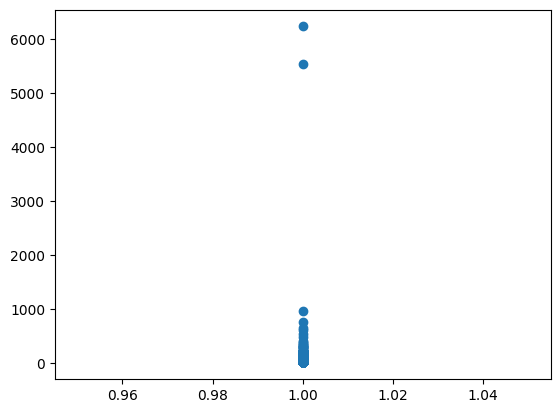

In [129]:
fig = plt.figure()
ax = plt.axes()
plt.scatter(test_pred,y_test)

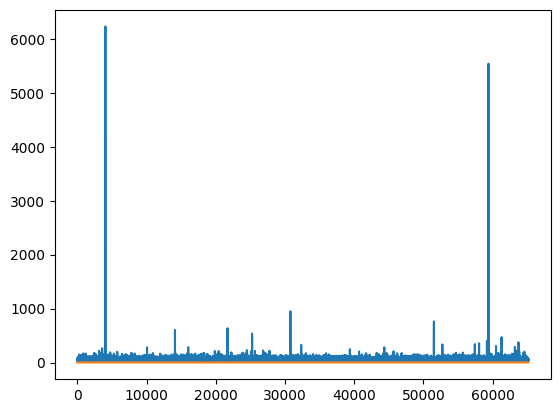

In [131]:
plt.plot(y_test)
plt.plot(test_pred)
plt.show()